# **Email Spam Detection**

# Big tech companies are always working on making sure they catch all those annoying spam emails and messages before they reach you. It’s a top priority for them to keep their customers happy and spam-free.Apple’s iMessage and Google’s Gmail are awesome at catching spam so you don’t have to deal with annoying spam messages

--------------------------
## **Project WorkFlow**
------------------------------

**Import Libraries**

**Data Loading**

**Data Preprocessing**

**Data Splitting**

**Model Training and Testing**

**Model Evaluation**

**Results**

---------------------

# **Import Libraries**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report

In [32]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# **Data Loading** 

In [44]:
df = pd.read_csv(r"C:\Users\sajal\Downloads\archive (8).zip", encoding= 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [45]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [46]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [47]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# **Data Preprocessing**

In [73]:
df

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0.0
5568,ham,Will Ì_ b going to esplanade fr home?,1.0
5569,ham,"Pity, * was in mood for that. So...any other s...",1.0
5570,ham,The guy did some bitching but I acted like i'd...,1.0


In [51]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)

In [52]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [54]:
df["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [75]:
df["v1"].unique()

array(['ham', 'spam'], dtype=object)

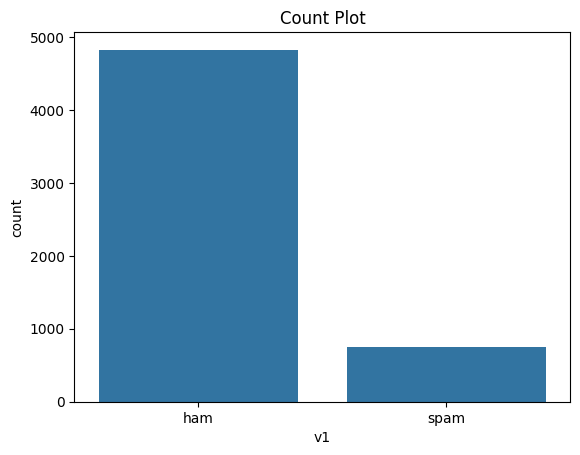

In [55]:
sns.countplot(data=df, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

In [56]:
# Convert the "Category" column values to numerical representation (0 for "spam" and 1 for "ham")

df.loc[df["v1"] == "spam", "Category"] = 0
df.loc[df["v1"] == "ham", "Category"] = 1

df.head()

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


In [57]:
# Separate the feature (v2) and target (category) data
X=df['v2']
y=df['Category']

In [59]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [60]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: Category, Length: 5572, dtype: float64

# **Split Data to Train and Test Data**

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

***Feature Extraction - TF-IDF***

In [62]:
#Create a TF-IDF vectorizer to convert text messages into numerical feature
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

# **Model Training**

In [63]:
model = LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

***Model Evaluation***

In [64]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 97.1729863136639 %
Accuracy on test data: 95.60538116591928 %


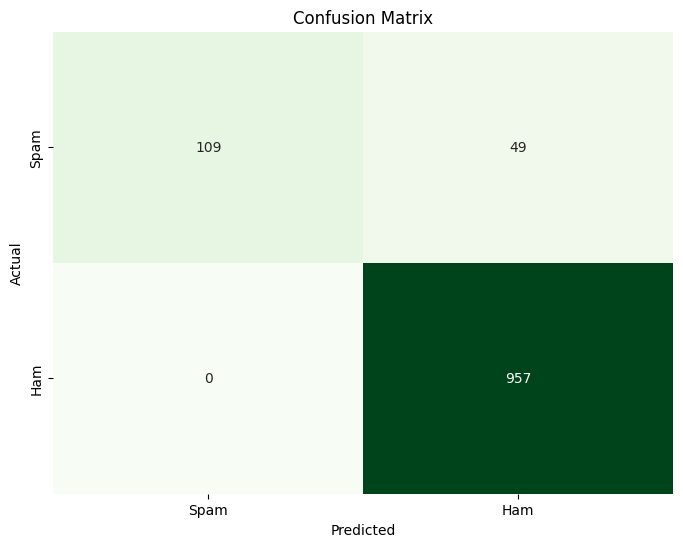

In [65]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# Classification report
classification_rep = classification_report(y_test, prediction_on_test_data,target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       1.00      0.69      0.82       158
         Ham       0.95      1.00      0.98       957

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.90      1115
weighted avg       0.96      0.96      0.95      1115



In [67]:
# Metrics calculation
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)

Accuracy :  0.9560538116591928
Precision :  0.9512922465208747
Recall :  1.0
Specificity :  0.689873417721519


In [70]:
#Spam i/p: Congratulations! You've won a luxury vacation package worth $10,000! Click here to claim your prize now!
#Ham i/p: Dear John, I hope this email finds you well. Attached is the report you requested for our upcoming meeting. Please review it at your convenience
input_your_mail ='XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'
input_data_features = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


# **Conclusion**

### Thats it! We have come to an end of our long exercise. Throughout the analysis we went through various steps to determine our predictions for the Email Spam Detection. We started with simple EDA where we analysed our dependent variable as well as other independent variables. We found out the correlation, count, relationships with the dependent variable. We looked for missing values and outliers and did some feature modifications.
-------------------------------------------------------------------------------
### We also implemented  techniques to identify the important features impacting our model predictions.
--------------------------------------------------------------------------------
### The accuracy of our best model was 0.95 and 0.95 for training and test set respectively, considering the simplicity and less no. of observations, this can be considered a good model. Performance can be improved even further by applying fine tunings and gathering more amount of observations so that the models can identify more patterns and become less prone to overfitting. With evolution of new technology, these numbers can change in future hence there will always be a need to check on the model from time to time. I hope this exercise will help you to take a step forward!